## Our Goals

Exploring a historical dataset of loan disbursements, filled with borrower financial demographics and specific loan details, our aim is to perform a thorough analysis of credit profile behaviors. This analysis will help us identify trends, pinpoint areas of oversight, and devise potential strategies for improvement in the following areas:

- Reducing the percentage of loan defaults
- Refining marketing & lending strategies

# Understanding our dataset:
- *Data represents more successful loans compared to unsuccessful loans*
- *Data represents loans between 2007~-2016*

# Recommendations

In [2]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

from src.util_functions import cliffs_delta


In [3]:
loan_df = pd.read_csv('datasets/lending_club_cleaned.csv')

# Can we highlight any relationships between features that may help us reduce % of charged off loans using borrower credit & financial profiles?
We will explore various features that relate to credit profile that may be a cause of more charge-offs.

**`Loan status vs DTI:`**
- **Descriptive**: The box plot clearly shows that the median DTI for charged-off loans is higher than fully paid-off loans. Also, the IQR is higher on the DTI scale than full-paid, also confirming that the inner spread of data (middle 50% of our dataset) in charged-off loans is higher than fully-paid loans.

- **Inferential**: We ran the Mann-Whitney U test on the data to challenge the null-hypothesis. The near zero p-value tells us that the observed difference in DTI distributions is highly unlikely to have occured by chance. The test rejects the null-hypothesis. 

- **Effect Size**: We used Cliff's Delta to assess the practical significance of the differences in DTI distributions between fully paid and charged-off loans. Cliff's Delta measures the degree of overlap between two features and provides a metric of effect size ranging from -1 to 1, where values closer to -1 or 1 indicate less overlap and a larger effect size. The consistently negative values obtained in our analysis (ranging around -0.18 across various samples) indicate a moderate effect size. This suggests that there is a greater likelihood of higher DTI values in the charged-off group compared to the fully paid group.


### Loan Status vs DTI
We will perform a comparison after excluding any loans with debt-to-income ratios (DTIs) exceeding 70, as these are generally associated with incomplete applications in the industry and are often flagged by loan officers as obvious candidates for denial. It is common for some entries to have placeholder figures such as 999 or 9999, or any value above 70, as recorded by the loan officer. This adjustment will enable a more accurate analysis of the influence on Loan State.

- Within the boxplot and violinplot, we can see medians and middle spread (25-75 quartiles) higher for the charge-off categories as DTI increases.
- The violinplot further shows us how wide the values can range at higher dtis and narrower than it's fully paid counter part which narrows at the top and widens as you go lower.


In [4]:
loan_df.query("dti > 70")['dti'].nunique()

13

In [5]:
loan_df.loc[loan_df.dti < 70][['loan_status', 'dti']].groupby('loan_status').median()

,dti
loan_status,
Charged Off,19.34
Fully Paid,16.34


In [6]:
loan_df.loc[loan_df.dti < 70][['loan_status', 'dti']].groupby('loan_status').quantile([.25,.5,.75])

dti
loan_status            
Charged Off 0.25  13.33
            0.50  19.34
            0.75  25.55
Fully Paid  0.25  10.87
            0.50  16.34
            0.75  22.29

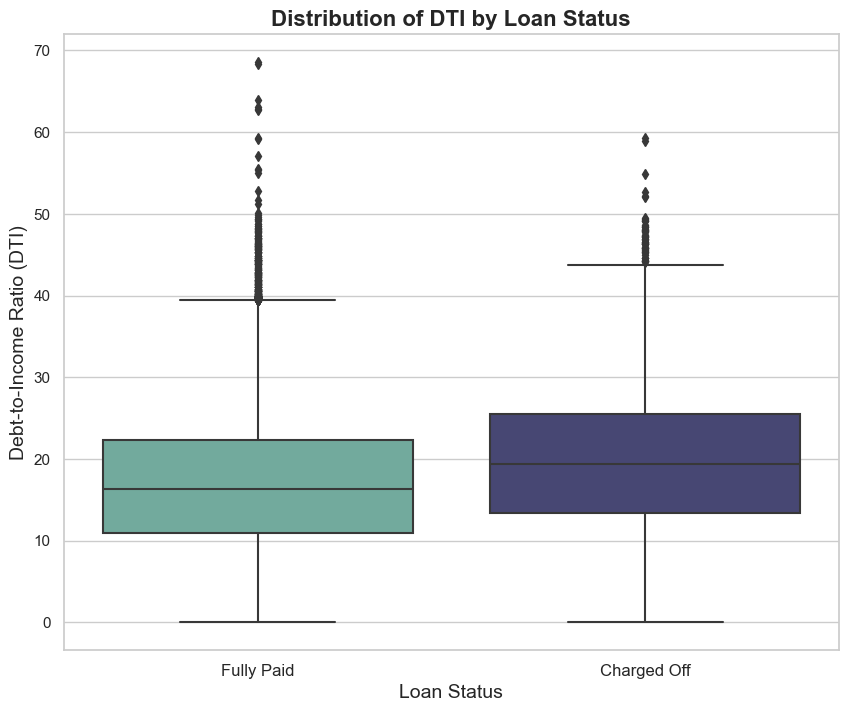

In [7]:
###############################ABIGAIL!!! LOOK HERE - Create a cell directly BELOW that contains the pretty version the plot below :)! Also, do not delete/replace this plot. 
# a Plotly Boxplot would do really well instead of this one for the final presentation.

sns.set_theme(style="whitegrid")
sns.set_palette(['#69b3a2', '#40407a'])

plt.figure(figsize=(10, 8))

ax = sns.boxplot(data=loan_df.loc[loan_df['dti'] < 70], x='loan_status', y='dti')

ax.set_title('Distribution of DTI by Loan Status', fontsize=16, fontweight='bold')
ax.set_xlabel('Loan Status', fontsize=14)
ax.set_ylabel('Debt-to-Income Ratio (DTI)', fontsize=14)
ax.set_xticklabels(['Fully Paid', 'Charged Off'], fontsize=12)

sns.set_context('talk')

plt.savefig('output_files/dti_enhanced.png', dpi=300)
plt.show()

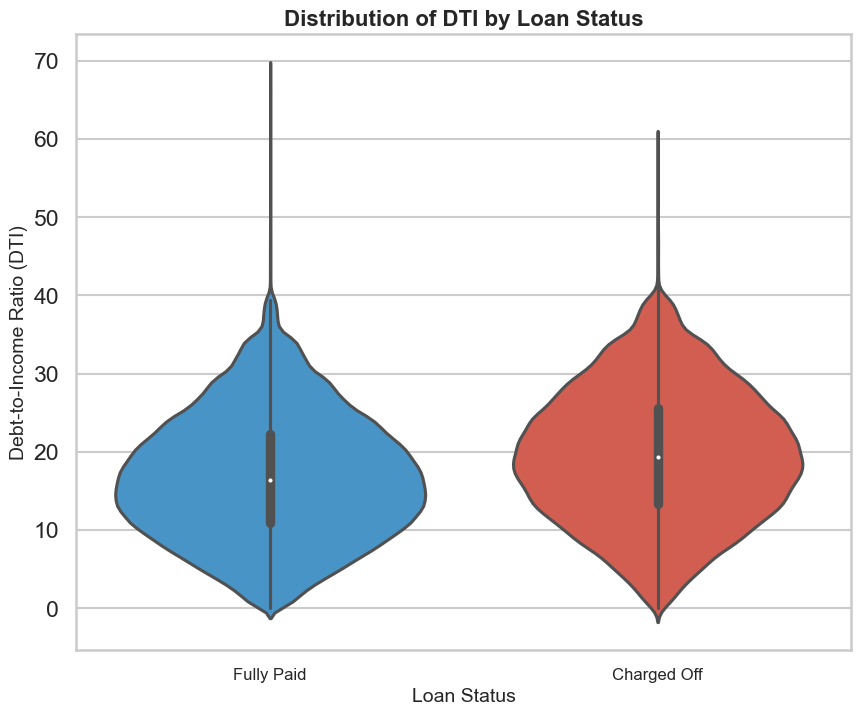

In [8]:
###############################ABIGAIL!!! LOOK HERE - Create a cell directly BELOW that contains the pretty version the plot below :)! 
# Also, do not delete/replace this plot. 
# For this plot, it doesnt have to be a violin plot, any plot that helps us assess more visually the distribution between DTI and Loan status that looks prettier. 
# This plot honestly wouldnt do well in a final presentation given it doesnt really scream an obvious relationship unless you have seen it before. 

plt.figure(figsize=(10, 8))
ax = sns.violinplot(data=loan_df.loc[loan_df['dti'] < 70], x='loan_status', y='dti',palette=['#3498db', '#e74c3c'])

ax.set_title('Distribution of DTI by Loan Status', fontsize=16, fontweight='bold')
ax.set_xlabel('Loan Status', fontsize=14)
ax.set_ylabel('Debt-to-Income Ratio (DTI)', fontsize=14)
ax.set_xticklabels(['Fully Paid', 'Charged Off'], fontsize=12)

sns.set_context('talk')

plt.savefig('output_files/dti_violin_enhanced.png', dpi=300)
plt.show()

In [9]:
# We will now perform a Mann-Whitney U Test, to compare median values between our two features. This test does not assume a normal distribution.
result = mannwhitneyu(loan_df[(loan_df['loan_status'] == 'Fully Paid') & (loan_df['dti'] < 70)]['dti'],
                      loan_df[(loan_df['loan_status'] == 'Charged Off') & (loan_df['dti'] < 70)]['dti'])
print(f'Mann-Whitney U test statistic: {result.statistic}')
print(f'p-value: {result.pvalue}')

Mann-Whitney U test statistic: 10065680603.0
p-value: 0.0


In [21]:
# Given a p-value 0, there is indeed statistical significance as we can reject the null hypothesis.
# We now need to calculate the effect size to check for practical significance. We will do that with Cliff's delta, which describes the degress of overlap between two features.
# Hardware cannot support testing entire data set, sampled 5000, 10000, 25000, 50000 to get an idea of our 
sample_test = [5000, 10000, 25000, 50000]
for sample_count in sample_test:
    change = cliffs_delta(
        loan_df[(loan_df['loan_status'] == 'Fully Paid') & (loan_df['dti'] < 70)]['dti'].sample(sample_count),
        loan_df[(loan_df['loan_status'] == 'Charged Off') & (loan_df['dti'] < 70)]['dti'].sample(sample_count)
        )

    print(f"Cliff's delta: {change}, based on {sample_count} sample size.")


Cliff's delta: -0.18371224, based on 5000 sample size.
Cliff's delta: -0.1766027, based on 10000 sample size.
Cliff's delta: -0.1847758144, based on 25000 sample size.
Cliff's delta: -0.1825345156, based on 50000 sample size.


In [12]:
# # Create a contingency table of loan status and annual income level
# contingency_table = pd.crosstab(raw_df['annual_inc_lvl'], raw_df['loan_status'])

# # Perform the chi-square test
# chi_result = chi2_contingency(contingency_table)

# print('Chi-square statistic:', chi_result.statistic)
# print('P-value:', chi_result.pvalue)
# contingency_table

In [13]:
# contig_perc = contingency_table.div(contingency_table.sum(axis=1), axis=0)
# plt.figure(figsize=(10, 8))
# sns.heatmap(contig_perc, annot=True, fmt=".2%", cmap="coolwarm", linewidths=.5)
# plt.title('Proportional Heatmap of Loan Status by Income Level')
# plt.ylabel('Loan Status')
# plt.xlabel('Annual Income Level')
# plt.show()

# contig_perc = contingency_table.div(contingency_table.sum(axis=1), axis=0)
# sns.heatmap(contig_perc, annot=True, fmt=".2%", cmap="coolwarm", linewidths=.5)
# plt.title('Proportional Heatmap of Loan Status by Income Level')
# plt.ylabel('Annual Income Level')
# plt.xlabel('Loan Status')
# plt.show()

# Need to calc cramers v to prove practical significance. 
# Cramer's V = 0.05 might be communicated as "There is a very weak association between the two variables. Despite the statistical significance, the impact of one variable on the other in practical terms is minimal."
# Cramer's V = 0.70 could be communicated as "There is a strong association between the variables, suggesting that changes in one are closely linked to changes in the other, which is important for predictive modeling and strategic decision-making."